In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
import django


SyntaxError: invalid syntax (597085335.py, line 1)

In [3]:
df = pd.read_csv('cancer patient data sets.csv', encoding = 'latin-1')

In [4]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
df['Patient Id'] = df['Patient Id'].str.lstrip('P')

In [8]:
df["Level"] = df["Level"].replace({"Low": 1, "Medium": 2, "High": 3})

In [9]:
df.drop(['index'], axis = 1, inplace = True)

In [10]:
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
996,996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,3
997,997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
998,998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [11]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,2.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,3.000000


In [12]:
# scale = StandardScaler()
# scaled = scale.fit_transform(df)

In [13]:
# scaled_df = pd.DataFrame(scaled, columns = df.columns)
# scaled_df

In [14]:
# scaled_df.info()

In [15]:
# scaled_df.describe()

In [16]:
df.isna().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [17]:
df.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2862aef0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2862b430>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2862ac50>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2862b970>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2862bc10>],
 'means': []}

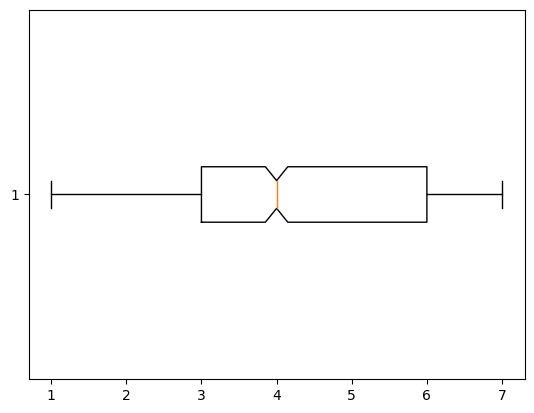

In [18]:
plt.boxplot(df['chronic Lung Disease'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc29f72260>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc29f727a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc29f71120>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc29f72ce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc29f72f80>],
 'means': []}

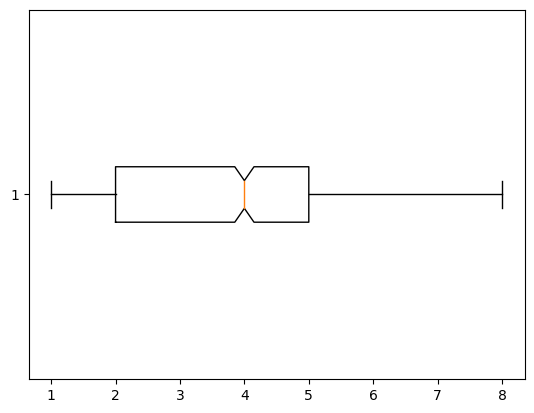

In [19]:
plt.boxplot(df.Wheezing,notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc29ff2500>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc29ff2a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc29ff2260>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc29ff2f80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc29ff3220>],
 'means': []}

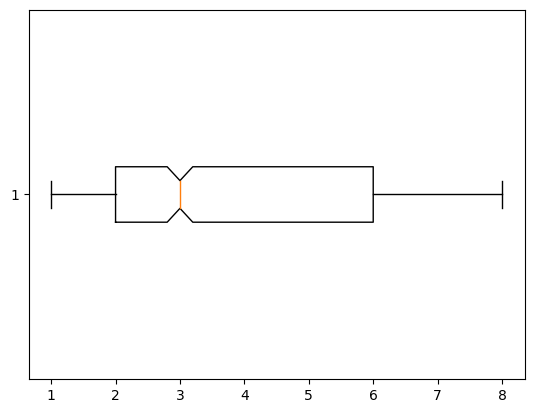

In [20]:
plt.boxplot(df['Weight Loss'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc23c8e0e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc23c8e620>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc23c8de40>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc23c8eb60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc23c8ee00>],
 'means': []}

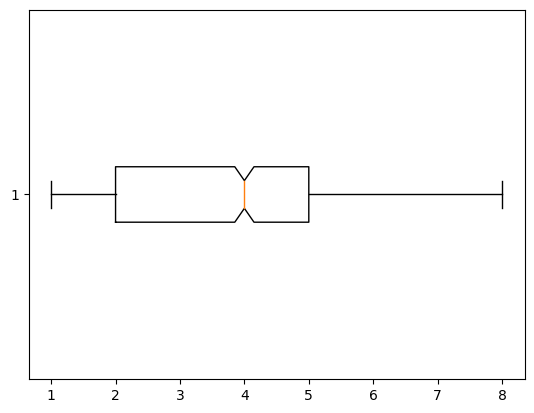

In [21]:
plt.boxplot(df['Swallowing Difficulty'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc23d02380>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc23d027a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc23d020e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc23d02ce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc23d02f80>],
 'means': []}

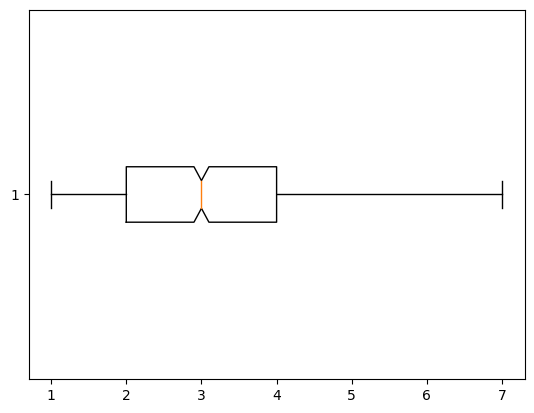

In [22]:
plt.boxplot(df.Snoring,notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc297797b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc29779bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc29779510>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2977a110>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2977a3b0>],
 'means': []}

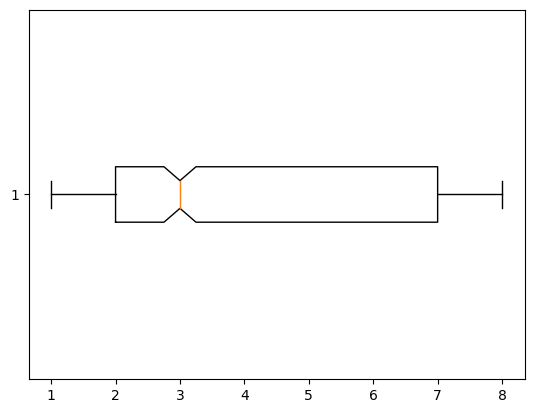

In [23]:
plt.boxplot(df.Smoking,notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc297f1930>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc297f1e70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc297f0640>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc297f23b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc297f2650>],
 'means': []}

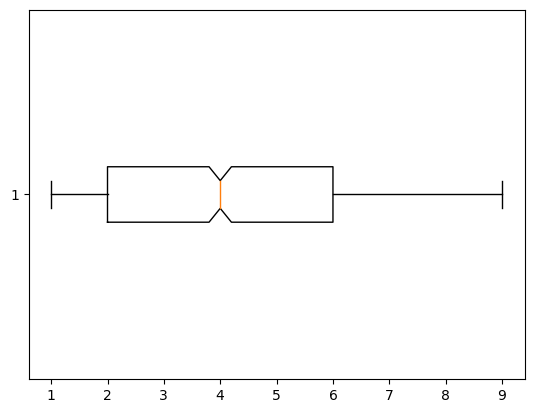

In [24]:
plt.boxplot(df['Shortness of Breath'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2a55dff0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2a55e530>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2a55dd50>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2a55ea70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2a55ed10>],
 'means': []}

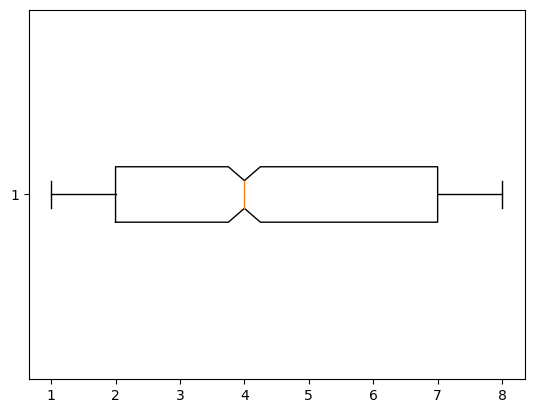

In [25]:
plt.boxplot(df['Passive Smoker'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2a5d62f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2a5d6710>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2a5d6050>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2a5d6c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2a5d6ef0>],
 'means': []}

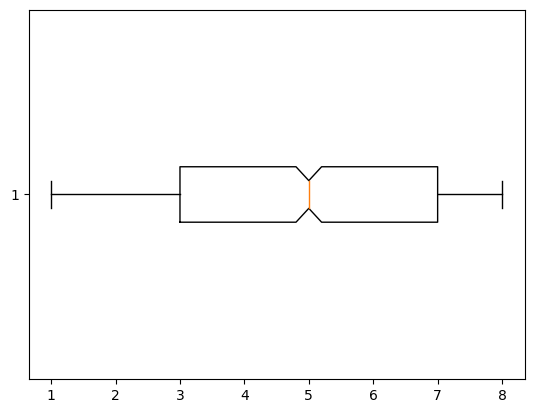

In [26]:
plt.boxplot(df['OccuPational Hazards'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2a651fc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2a652500>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2a651d20>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2a652a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2a652ce0>],
 'means': []}

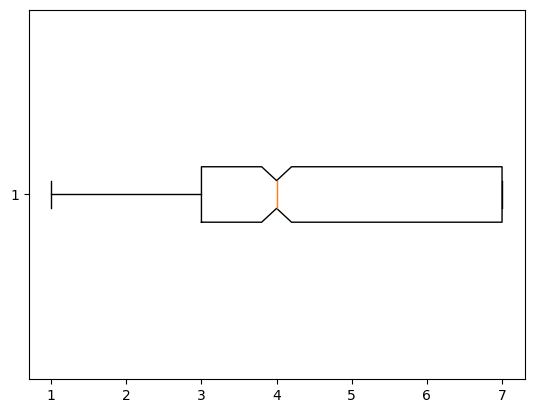

In [27]:
plt.boxplot(df.Obesity,notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2a6c9750>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2a6c9c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2a6c94b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2a6ca1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2a6ca470>],
 'means': []}

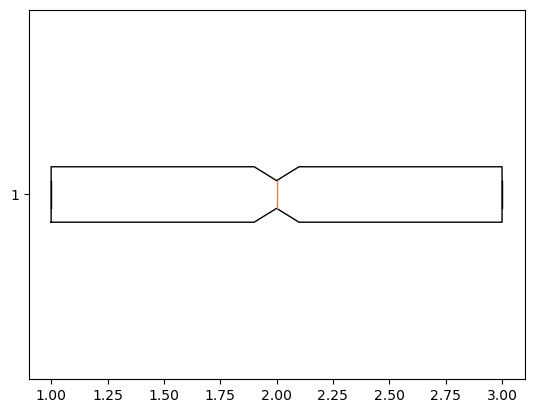

In [28]:
plt.boxplot(df.Level,notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc23d351e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc23d36680>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc23d345b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2977b6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2977a680>],
 'means': []}

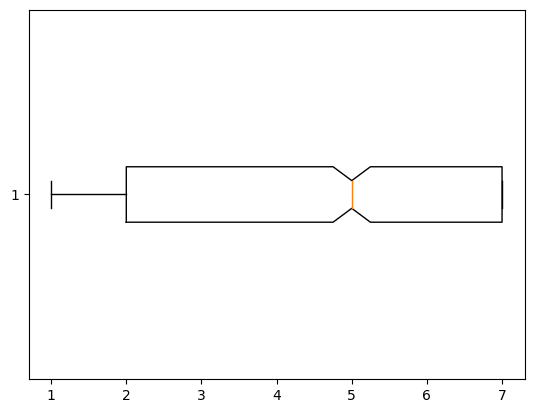

In [29]:
plt.boxplot(df['Genetic Risk'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2a716aa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2a716fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2a716800>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2a717520>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2a7177c0>],
 'means': []}

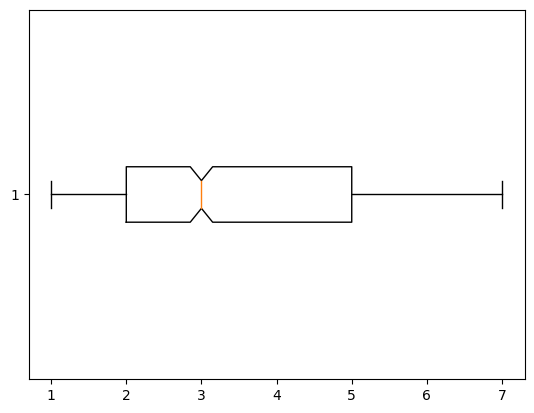

In [30]:
plt.boxplot(df['Frequent Cold'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc23be1c30>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc23be2170>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc23be1990>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc23be26e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc23be2980>],
 'means': []}

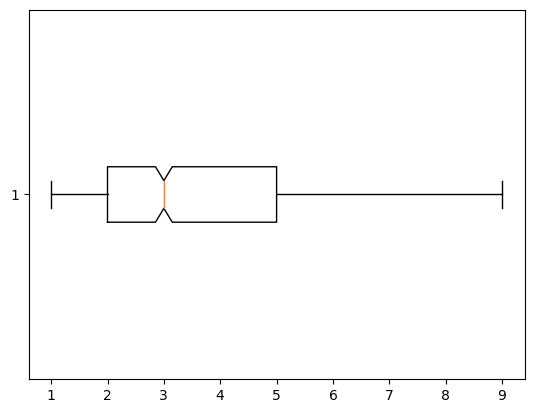

In [31]:
plt.boxplot(df.Fatigue,notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2a786710>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2a786b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2a786470>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2a787070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2a787310>],
 'means': []}

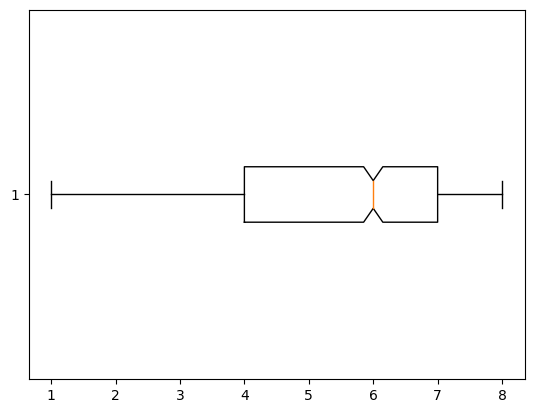

In [32]:
plt.boxplot(df['Dust Allergy'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2a7fa4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2a7faa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2a7fa230>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2a7faf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2a7fb1f0>],
 'means': []}

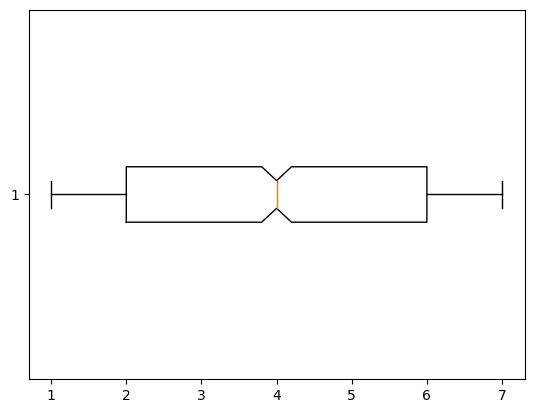

In [33]:
plt.boxplot(df['Dry Cough'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2b9c5d20>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2b9c6260>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2b9c5a80>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2b9c67a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2b9c6a40>],
 'means': []}

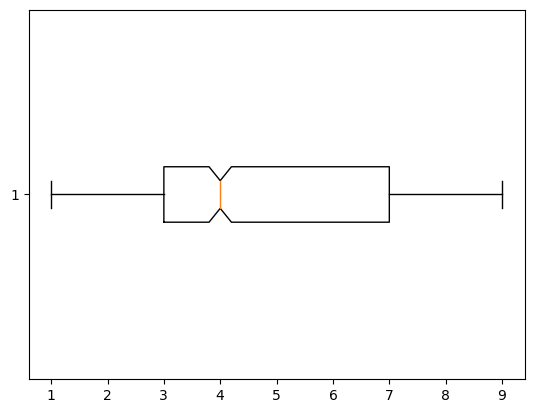

In [34]:
plt.boxplot(df['Coughing of Blood'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2ba3a320>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2ba3a770>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2ba3a080>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2ba3acb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2ba3af50>],
 'means': []}

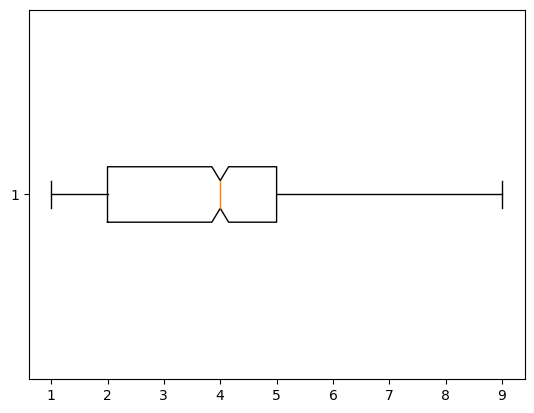

In [35]:
plt.boxplot(df['Clubbing of Finger Nails'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2bab2f20>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2bab3460>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2bab2c80>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2bab39d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2ba70100>],
 'means': []}

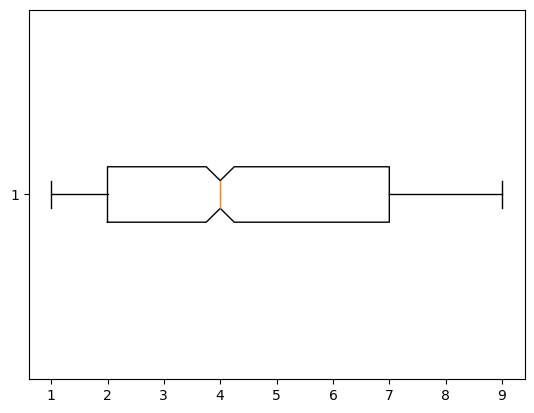

In [36]:
plt.boxplot(df['Chest Pain'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2bb2b760>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2bb2bb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2bb2b4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2bb5c100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2bb5c3a0>],
 'means': []}

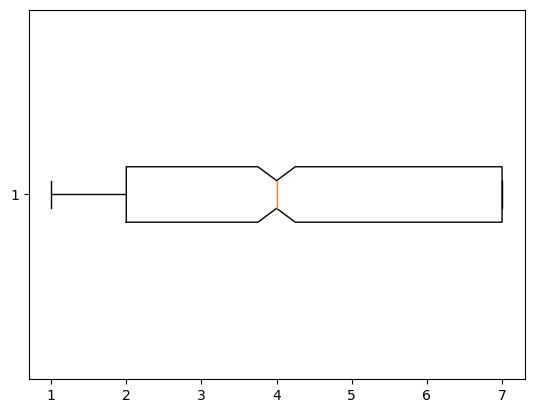

In [37]:
plt.boxplot(df['Balanced Diet'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2bba6e60>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2bae1cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2bba6bc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2bba7340>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2bba75e0>],
 'means': []}

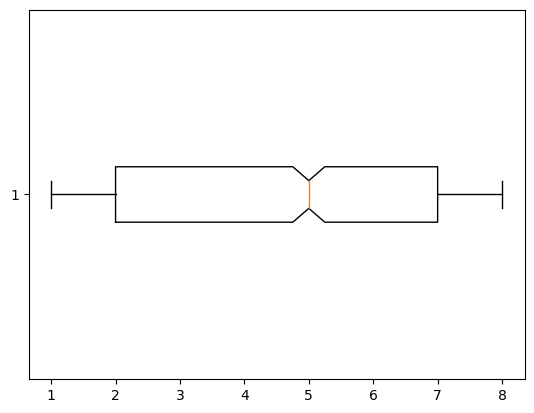

In [38]:
plt.boxplot(df['Alcohol use'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2bc22b00>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2bc23040>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2bc22860>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2bc23580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2bc23820>],
 'means': []}

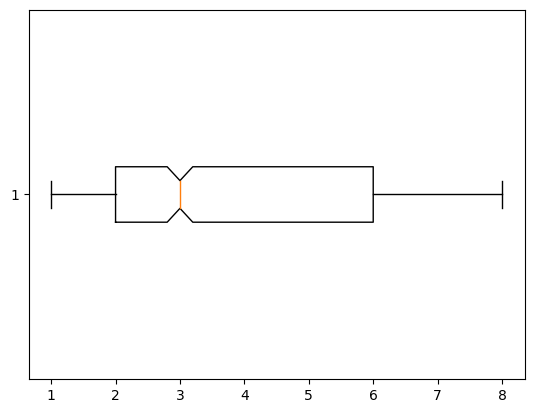

In [39]:
plt.boxplot(df['Air Pollution'],notch=True,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2b852920>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2b852e60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2b8526e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2b853190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2b853430>],
 'means': []}

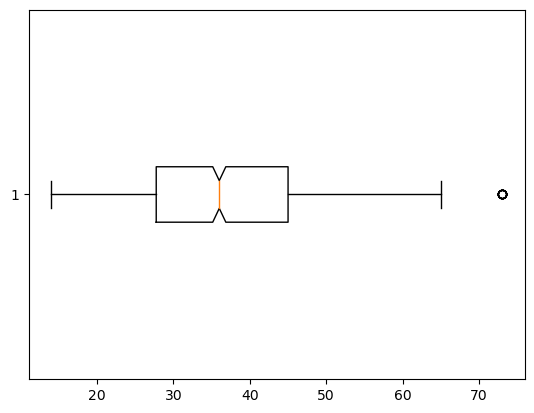

In [40]:
plt.boxplot(df.Age,notch=True,vert=False)

In [41]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
df = df[~outliers.any(axis=1)]

C:\Users\Ahmed Salah\AppData\Local\Temp\ipykernel_6952\3614066427.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\Ahmed Salah\AppData\Local\Temp\ipykernel_6952\3614066427.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\Ahmed Salah\AppData\Local\Temp\ipykernel_6952\3614066427.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


{'whiskers': [<matplotlib.lines.Line2D at 0x2cc2b8e8520>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc2b8e8a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc2b8e8280>],
 'medians': [<matplotlib.lines.Line2D at 0x2cc2b8e8fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cc2b8e9240>],
 'means': []}

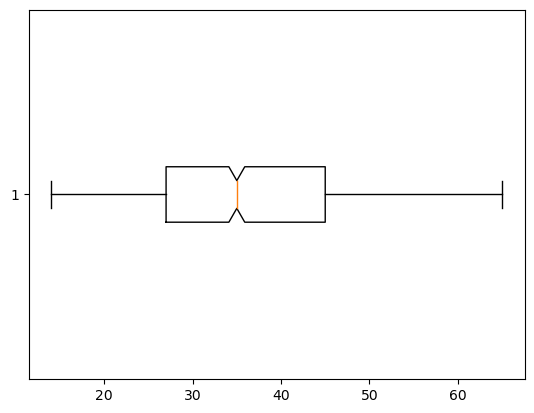

In [42]:
plt.boxplot(df.Age,notch=True,vert=False)

In [43]:
df.mean(numeric_only=True)

Age                         36.812121
Gender                       1.406061
Air Pollution                3.828283
Alcohol use                  4.548485
Dust Allergy                 5.156566
OccuPational Hazards         4.838384
Genetic Risk                 4.565657
chronic Lung Disease         4.373737
Balanced Diet                4.475758
Obesity                      4.459596
Smoking                      3.907071
Passive Smoker               4.186869
Chest Pain                   4.432323
Coughing of Blood            4.857576
Fatigue                      3.854545
Weight Loss                  3.863636
Shortness of Breath          4.222222
Wheezing                     3.794949
Swallowing Difficulty        3.773737
Clubbing of Finger Nails     3.942424
Frequent Cold                3.561616
Dry Cough                    3.831313
Snoring                      2.935354
Level                        2.062626
dtype: float64

In [44]:
df.median(numeric_only=True)

Age                         35.0
Gender                       1.0
Air Pollution                3.0
Alcohol use                  5.0
Dust Allergy                 6.0
OccuPational Hazards         5.0
Genetic Risk                 5.0
chronic Lung Disease         4.0
Balanced Diet                4.0
Obesity                      4.0
Smoking                      3.0
Passive Smoker               4.0
Chest Pain                   4.0
Coughing of Blood            4.0
Fatigue                      3.0
Weight Loss                  3.0
Shortness of Breath          4.0
Wheezing                     4.0
Swallowing Difficulty        4.0
Clubbing of Finger Nails     4.0
Frequent Cold                3.0
Dry Cough                    4.0
Snoring                      3.0
Level                        2.0
dtype: float64

In [45]:
df.mode(numeric_only=True)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,35,1,6,2,7,7,7,6,7,7,...,3,2,2,2,1,2,3,2,2,3


In [46]:
df.var(numeric_only=True)

Age                         132.480338
Gender                        0.241419
Air Pollution                 4.150463
Alcohol use                   6.915240
Dust Allergy                  3.956251
OccuPational Hazards          4.487504
Genetic Risk                  4.549274
chronic Lung Disease          3.447641
Balanced Diet                 4.583335
Obesity                       4.558022
Smoking                       6.124824
Passive Smoker                5.391738
Chest Pain                    5.248701
Coughing of Blood             5.954417
Fatigue                       5.089034
Weight Loss                   4.910608
Shortness of Breath           5.242782
Wheezing                      4.179348
Swallowing Difficulty         5.129744
Clubbing of Finger Nails      5.722668
Frequent Cold                 3.326331
Dry Cough                     4.152507
Snoring                       2.187930
Level                         0.671504
dtype: float64

In [47]:
df.std(numeric_only=True)

Age                         11.510010
Gender                       0.491344
Air Pollution                2.037269
Alcohol use                  2.629684
Dust Allergy                 1.989033
OccuPational Hazards         2.118373
Genetic Risk                 2.132903
chronic Lung Disease         1.856782
Balanced Diet                2.140872
Obesity                      2.134952
Smoking                      2.474838
Passive Smoker               2.322012
Chest Pain                   2.291004
Coughing of Blood            2.440167
Fatigue                      2.255889
Weight Loss                  2.215989
Shortness of Breath          2.289712
Wheezing                     2.044345
Swallowing Difficulty        2.264894
Clubbing of Finger Nails     2.392210
Frequent Cold                1.823823
Dry Cough                    2.037770
Snoring                      1.479165
Level                        0.819453
dtype: float64

Text(0.5, 1.0, 'Age')

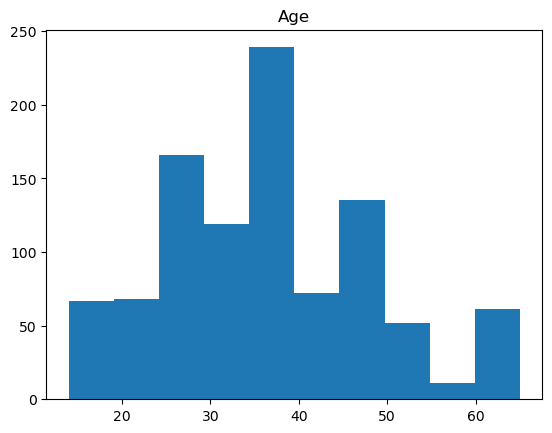

In [48]:
# We conclude from this figure that Most patients are not elderly
plt.hist(df['Age']) 
plt.title('Age')

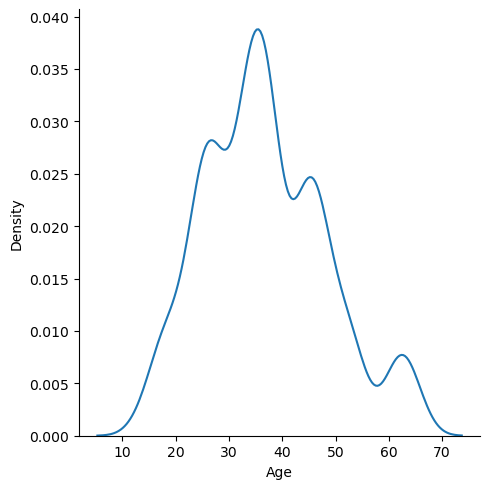

In [49]:
# We conclude from this figure that the highest percentage of patients is at age 35 
# and the lowest percentage is at age 68
sns.displot(x = 'Age', data = df, kind = 'kde')

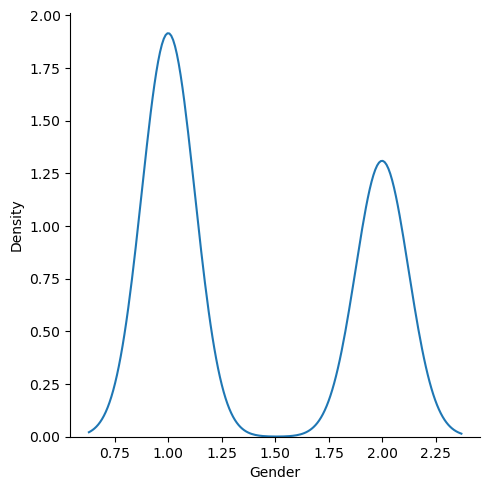

In [50]:
# We conclude from this figure that the highest percentage of patients is men
# and the lowest percentage is women 
sns.displot(x = 'Gender', data = df, kind = 'kde')

Text(0.5, 1.0, 'Air Pollution')

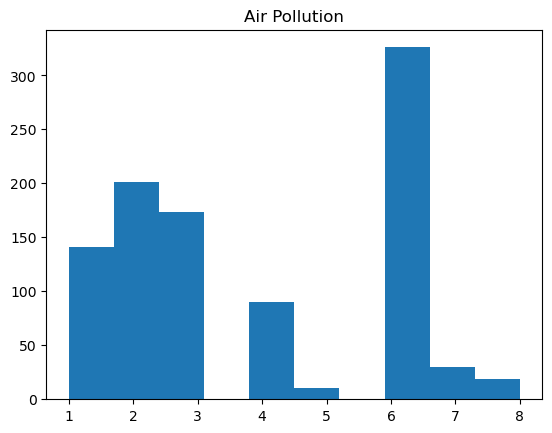

In [51]:
# We conclude from this figure that air pollution level is 50% of patient are less than 3 
#and 10% of patient are 4 or 5 and 40% of patient are more than 6
plt.hist(df['Air Pollution']) 
plt.title('Air Pollution')

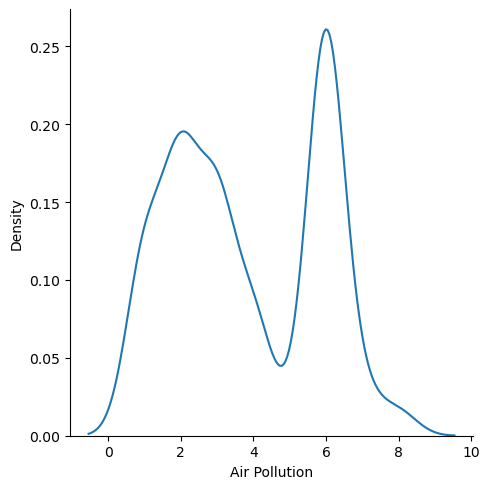

In [52]:
# We conclude from this figure that the level of air pollution 
# in the intervals [0,2] , [4.5,6] increase and [2,4.5] , [6,10] decrease
sns.displot(x = 'Air Pollution', data = df, kind = 'kde')

Text(0.5, 1.0, 'Alcohol use')

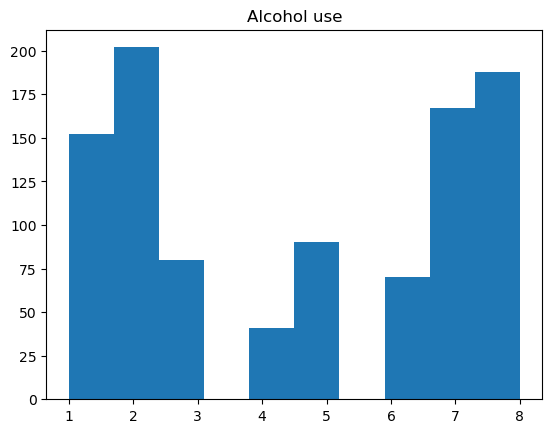

In [53]:
# We conclude from this figure that the level of alcohol use is about 42% of patientare less than 3 
# and 13% of patient are 4 or 5 and 45% of patient are more than 6
plt.hist(df['Alcohol use']) 
plt.title('Alcohol use')

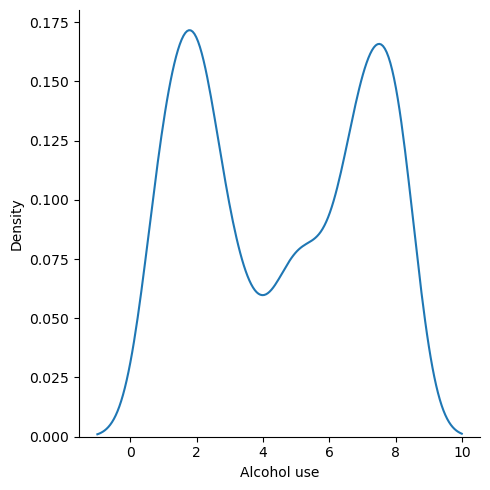

In [54]:
# We conclude from this figure that the level of alcohol use 
# in the intervals [0,2] , [4,7] increase and [2,4] , [7,10] decrease
sns.displot(x = 'Alcohol use', data = df, kind = 'kde')

Text(0.5, 1.0, 'Dust Allergy')

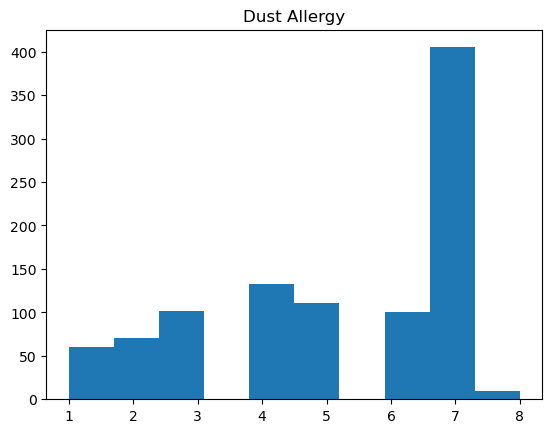

In [55]:
# We conclude from this figure that he level of dust allergy is 22% of patient are less than 3 
# and 23% of patient are 4 or 5 and 55% of patient are more than 6
plt.hist(df['Dust Allergy']) 
plt.title('Dust Allergy')

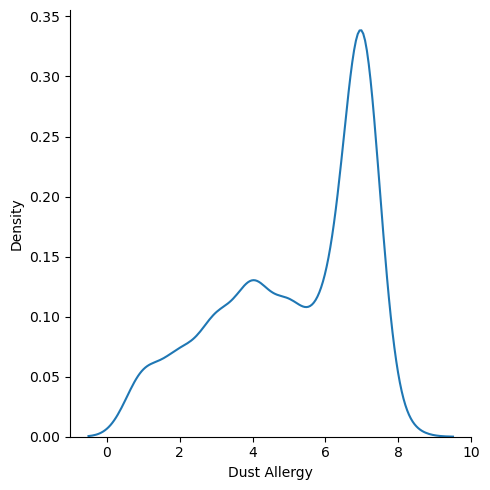

In [56]:
# We conclude from this figure that the level of dust allergy 
# in the intervals [0,4] , [6,7] increase and [4,6] , [7,10] decrease
sns.displot(x = 'Dust Allergy', data = df, kind = 'kde')

Text(0.5, 1.0, 'OccuPational Hazards')

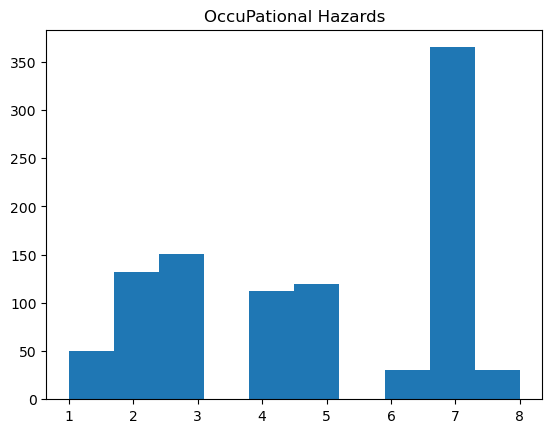

In [57]:
# We conclude from this figure that he level of occupational hazards is 33% of patient are less than 3 
# and 24% of patient are 4 or 5 and 43% of patient are more than 6
plt.hist(df['OccuPational Hazards'])
plt.title('OccuPational Hazards')

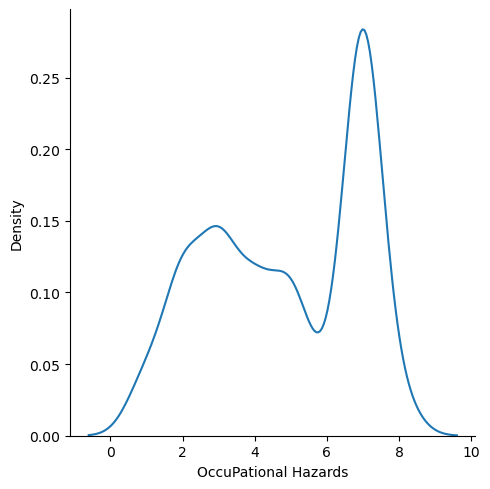

In [58]:
# We conclude from this figure that the level of OccPational hazards 
# in the intervals [0,3] , [6,7] increase and [3,6] , [7,10] decrease
sns.displot(x = 'OccuPational Hazards', data = df, kind = 'kde')

Text(0.5, 1.0, 'Genetic Risk')

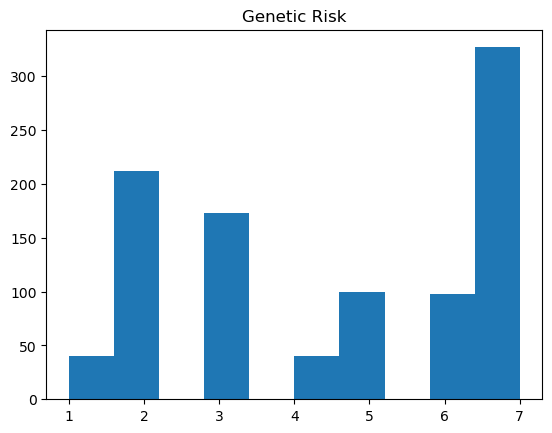

In [59]:
# We conclude from this figure that the level of genetic risk is 26% of patient are 1 or 2 
# and 16% of patient are 3 and 14% of patient are 4 or 5 and 44% of patient between 6 and 7
plt.hist(df['Genetic Risk'])
plt.title('Genetic Risk')

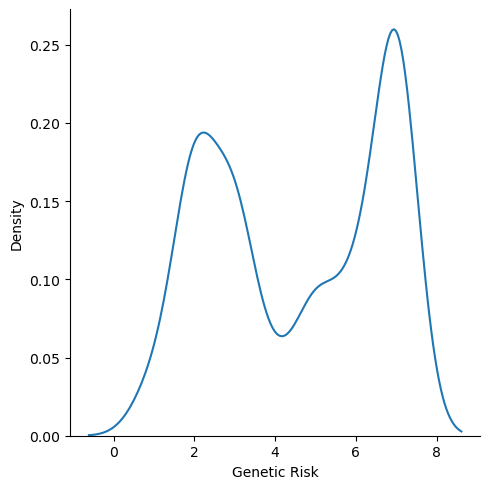

In [60]:
# We conclude from this figure that the level of genetic risk 
# in the intervals [0,2] , [4,7] increase and [2,4] , [7,8] decrease
sns.displot(x = 'Genetic Risk', data = df, kind = 'kde')

Text(0.5, 1.0, 'chronic Lung Disease')

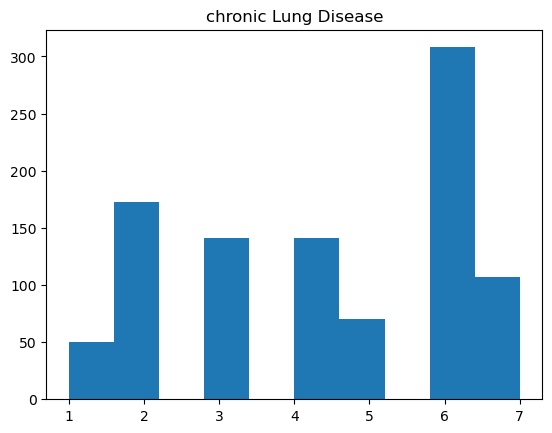

In [61]:
# We conclude from this figure that the level of chronic Lung disease is 22% of patient are 1 or 2 
# and 14% of patient are 3 and 21% of patient are 4 or 5 and 43% of patient between 6 and 7
plt.hist(df['chronic Lung Disease'])
plt.title('chronic Lung Disease')

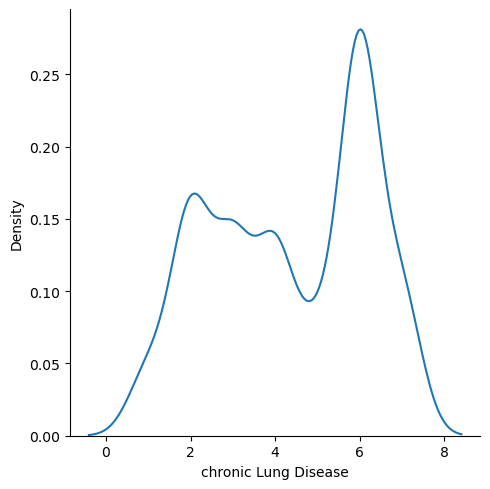

In [62]:
# We conclude from this figure that the level of chronic lung disease 
# in the intervals [0,2] , [5,6] increase and [2,5] , [6,8] decrease
sns.displot(x = 'chronic Lung Disease', data = df, kind = 'kde')

Text(0.5, 1.0, 'Balanced Diet')

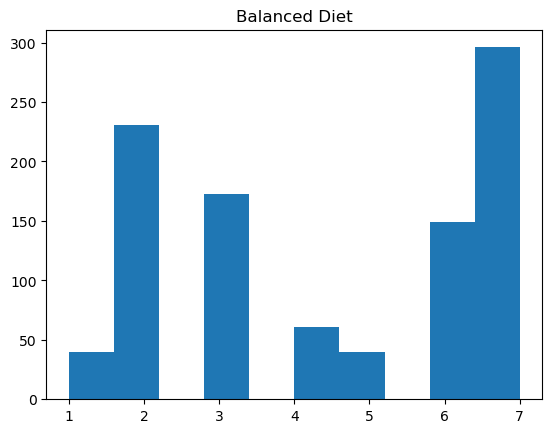

In [63]:
# We conclude from this figure that the level of balanced diet is 26% of patient are 1 or 2 
# and 17% of patient are 3 and 10% of patient are 4 or 5 and 47% of patient between 6 and 7
plt.hist(df['Balanced Diet'])
plt.title('Balanced Diet')

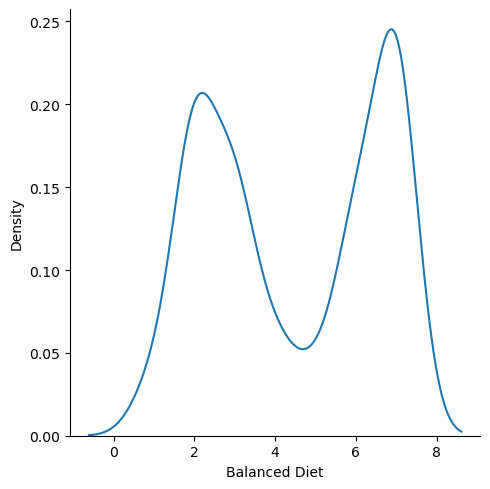

In [64]:
# We conclude from this figure that the level of balanced diet 
# in the intervals [0,2] , [5,7] increase and [2,5] , [7,8] decrease
sns.displot(x = 'Balanced Diet', data = df, kind = 'kde')

Text(0.5, 1.0, 'Obesity')

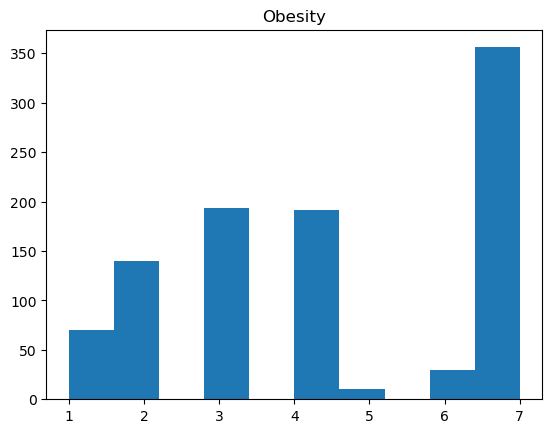

In [65]:
# We conclude from this figure that the level of obesity is 21% of patient are 1 or 2 
# and 20% of patient are 3 and 21% of patient are 4 or 5 and 38% of patient between 6 and 7
plt.hist(df['Obesity']) 
plt.title('Obesity')

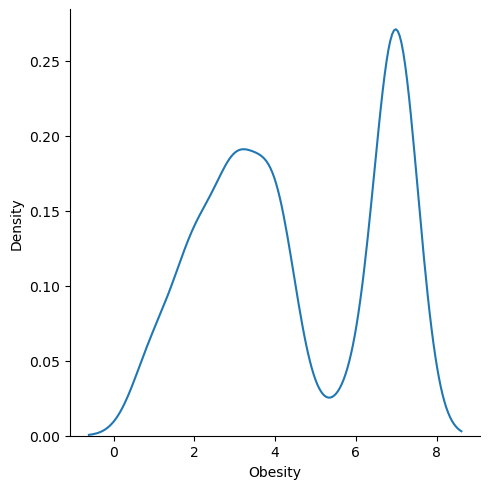

In [66]:
# We conclude from this figure that the highest percentage of patients is 
# at point 7 of obesity and the lowest percentage is at point 5.5
sns.displot(x = 'Obesity', data = df, kind = 'kde')

Text(0.5, 1.0, 'Smoking')

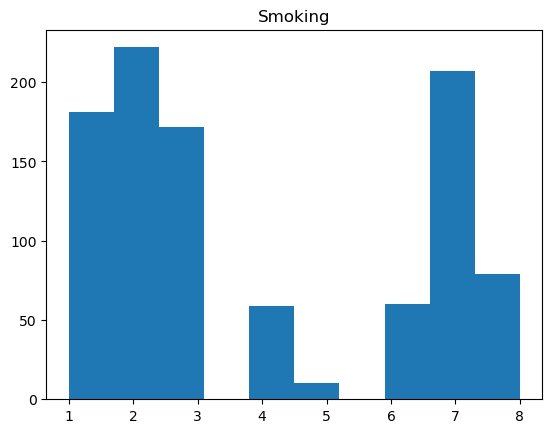

In [67]:
# We conclude from this figure that the level of smoking is 57% of patient are less than 3 
# and 7% of patient are 4 or 5 and 36% of patient are more than 6
plt.hist(df['Smoking']) 
plt.title('Smoking')

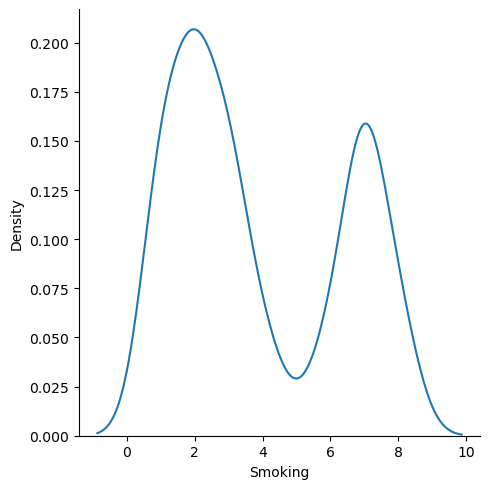

In [68]:
# We conclude from this figure that the level of smoking in the intervals [0,2] , [5,7] increase 
# and [2,5] , [7,10] decrease
sns.displot(x = 'Smoking', data = df, kind = 'kde')

Text(0.5, 1.0, 'Passive Smoker')

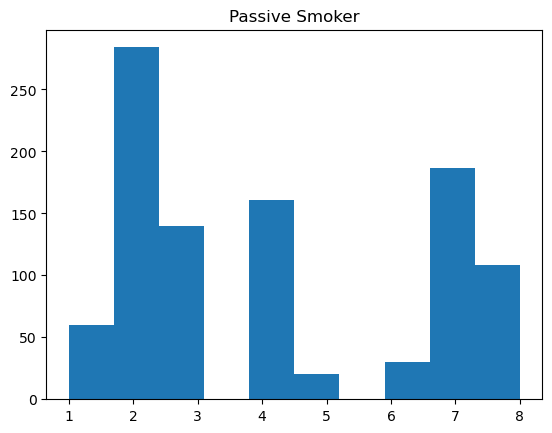

In [69]:
# We conclude from this figure that the level of passive smoker is 48% of patient are less than 3
# and 18% of patient are 4 or 5 and 34% of patient are more than 6
plt.hist(df['Passive Smoker']) 
plt.title('Passive Smoker')

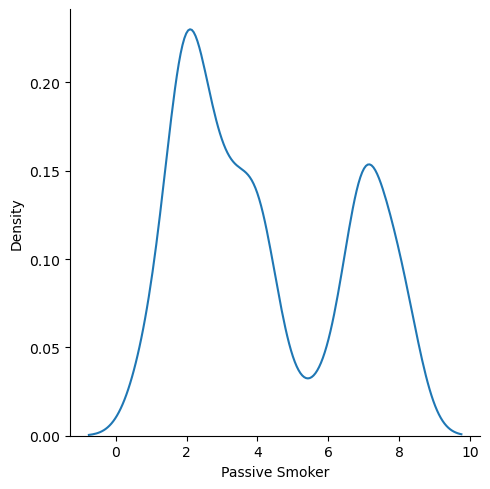

In [70]:
# We conclude from this figure that the level of passive smoker 
# in the intervals [0,2] , [5,7] increase and [2,5] , [7,10] decrease
sns.displot(x = 'Passive Smoker', data = df, kind = 'kde')

Text(0.5, 1.0, 'Chest Pain')

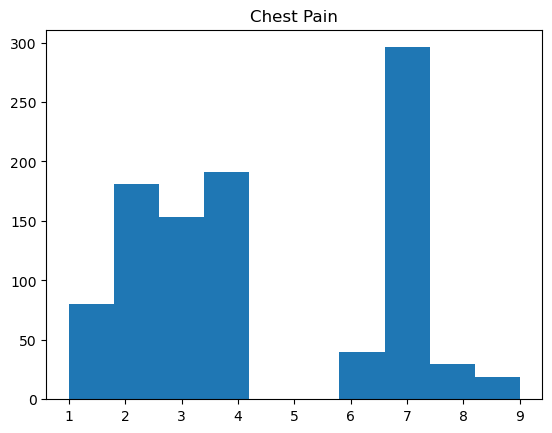

In [71]:
# We conclude from this figure that the level of chest pain is 64% of patient are less than 4
# and 36% of patient are more than 6
plt.hist(df['Chest Pain']) 
plt.title('Chest Pain')

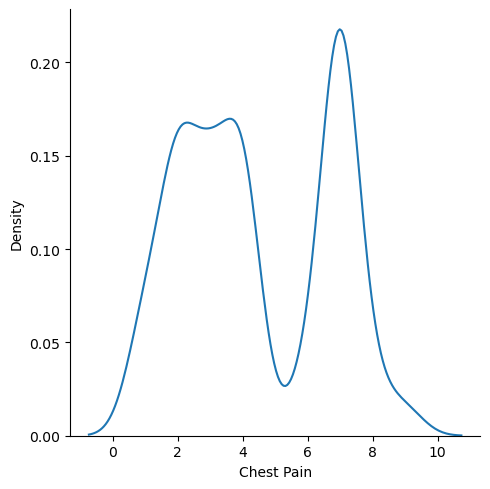

In [72]:
# We conclude from this figure that the highest percentage of patients is 
# at point 7 of chest pain and the lowest percentage is at point 5.5
sns.displot(x = 'Chest Pain', data = df, kind = 'kde')

Text(0.5, 1.0, 'Coughing of Blood')

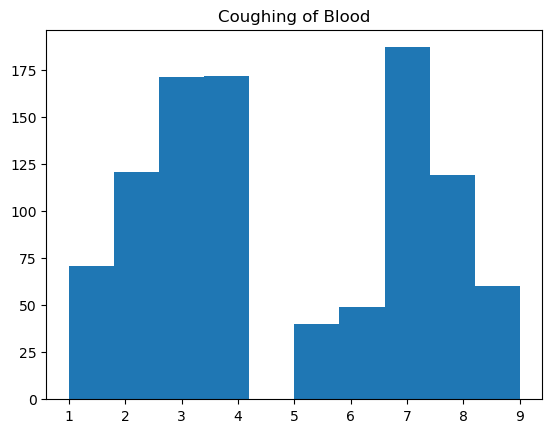

In [73]:
# We conclude from this figure that the level of coughing of blood is 54% of patient are less than 4
# and 46% of patient are between 5 and 9
plt.hist(df['Coughing of Blood'])
plt.title('Coughing of Blood')

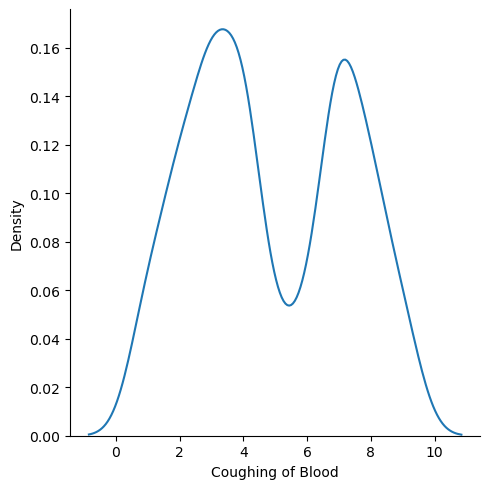

In [74]:
# We conclude from this figure that the level of coughing of blood 
# in the intervals [0,3] , [5.5,7] increase and [3,5.5] , [7,10] decrease
sns.displot(x = 'Coughing of Blood', data = df, kind = 'kde')

Text(0.5, 1.0, 'Fatigue')

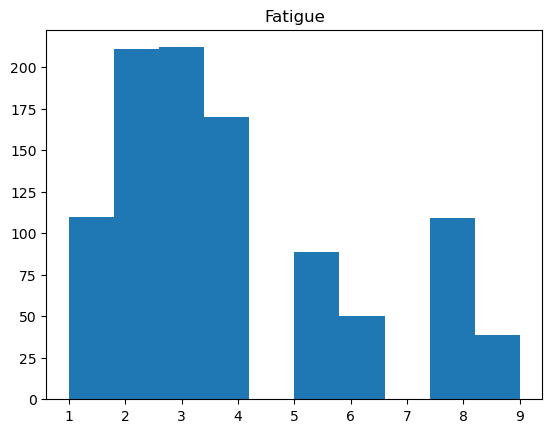

In [75]:
# We conclude from this figure that he level of fatique is 69% of patient are less than 4 
# and 13% of patient are 5 or 6 and 18% of patient are more than 7
plt.hist(df['Fatigue']) 
plt.title('Fatigue')

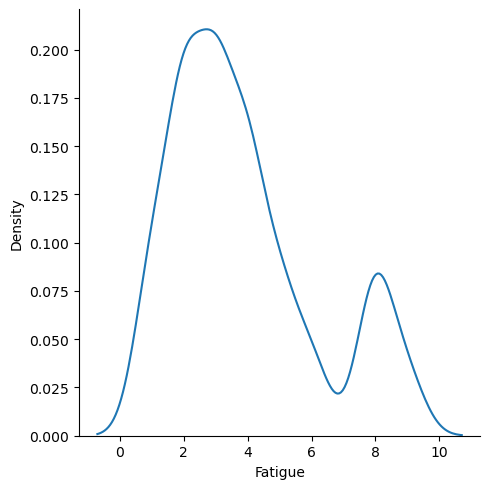

In [76]:
# We conclude from this figure that the highest percentage of patients is 
# at point 2 of fatigue and the lowest percentage is at point 7
sns.displot(x = 'Fatigue', data = df, kind = 'kde')

Text(0.5, 1.0, 'Weight Loss')

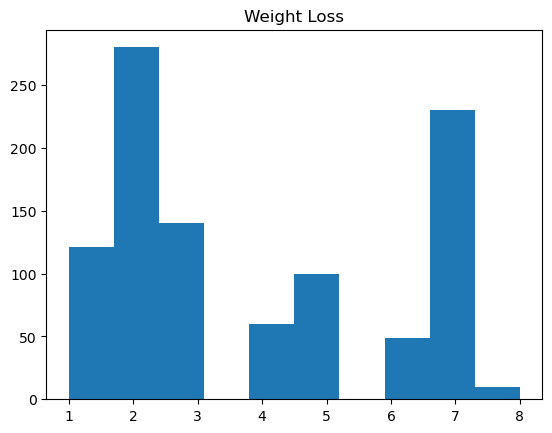

In [77]:
# We conclude from this figure that the level of weight loss is 53% of patient are less than 3 
# and 16% of patient are 4 or 5 and 31% of patient are more than 6
plt.hist(df['Weight Loss']) 
plt.title('Weight Loss')

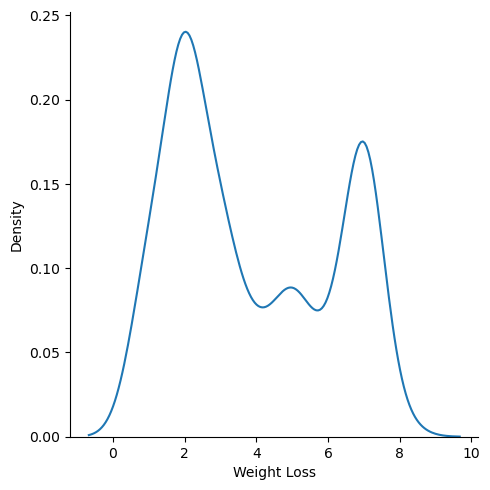

In [78]:
# We conclude from this figure that the level of weight loss 
# in the intervals [0,2] , [4,5] , [6,7] increase and [2,4] , [5,6] , [7,8] decrease
sns.displot(x = 'Weight Loss', data = df, kind = 'kde')

Text(0.5, 1.0, 'Shortness of Breath')

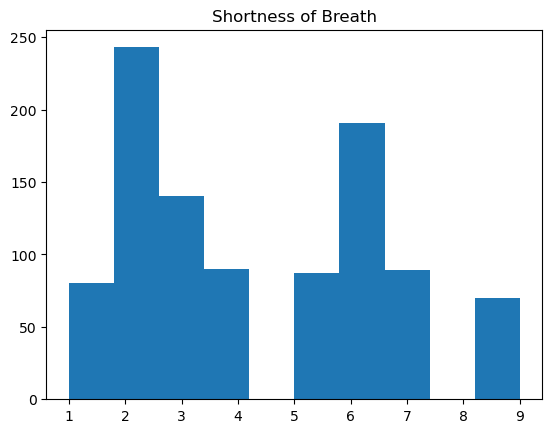

In [79]:
# We conclude from this figure the level of shortness of breath is 54% of patient are less than 4 
# and 37% of patient are from 5 to 7 and 9% of patient are between 8 and 9
plt.hist(df['Shortness of Breath']) 
plt.title('Shortness of Breath')

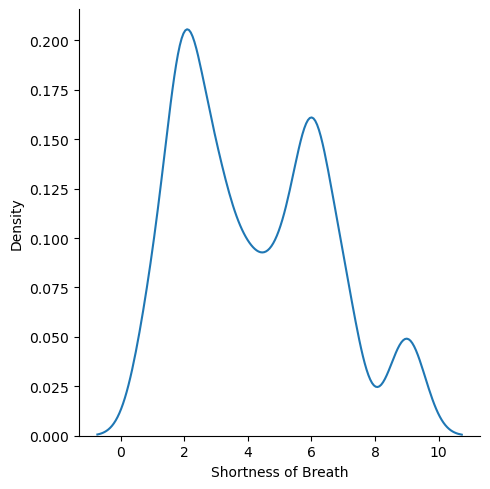

In [80]:
# We conclude from this figure that the level of shortness of breath 
# in the intervals [0,2] , [4,6] , [8,9] increase and [2,4] , [6,8] , [9,10] decrease
sns.displot(x = 'Shortness of Breath', data = df, kind = 'kde')

Text(0.5, 1.0, 'Wheezing')

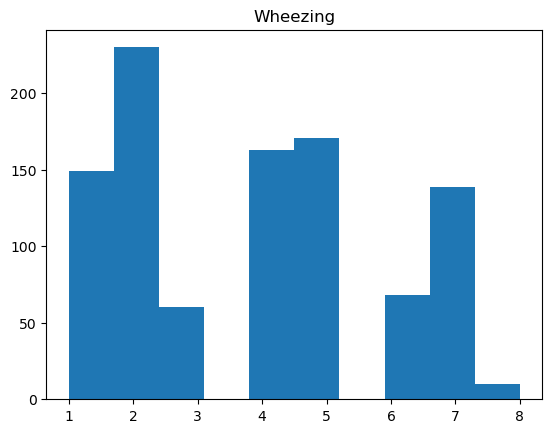

In [81]:
# We conclude from this figure that the level of wheezing is 45% of patient are less than 3 
# and 33% of patient are 4 or 5 and 22% of patient are more than 6
plt.hist(df['Wheezing']) 
plt.title('Wheezing')

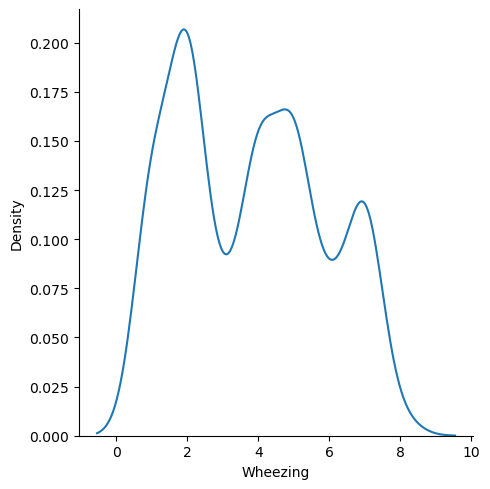

In [82]:
# We conclude from this figure that the level of wheezing in the intervals [0,2] , [3,5] , [6,7] increase
# and [2,3] , [5,6] , [7,8] decrease
#sns.distplot (df['Wheezing'],kde_kws = {'shade': True},hist=False)
sns.displot(x = 'Wheezing', data = df, kind = 'kde')

Text(0.5, 1.0, 'Swallowing Difficulty')

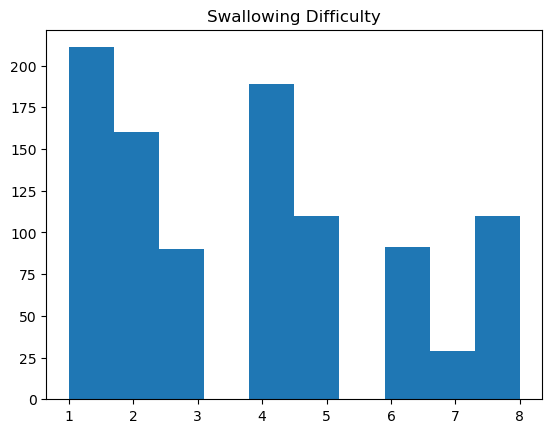

In [83]:
# We conclude from this figure that the level of swallowing difficulty is 46% of patient are less than 3
# and 30% of patient are 4 or 5 and 24% of patient are more than 6
plt.hist(df['Swallowing Difficulty']) 
plt.title('Swallowing Difficulty')

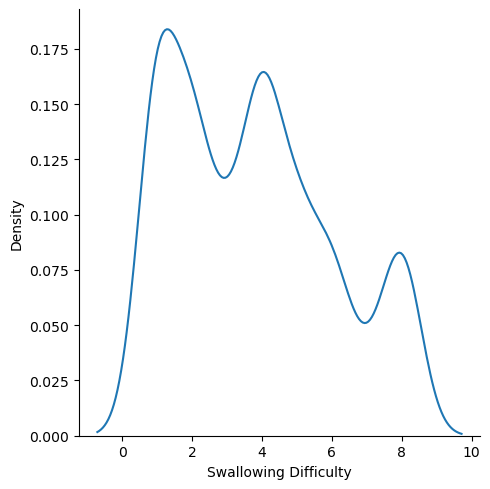

In [84]:
# We conclude from this figure that the level of swallowing difficulty 
# in the intervals [0,1] , [3,4] , [7,8] increase and [1,3] , [4,7] , [8,10] decrease
sns.displot(x = 'Swallowing Difficulty', data = df, kind = 'kde')

Text(0.5, 1.0, 'Clubbing of Finger Nails')

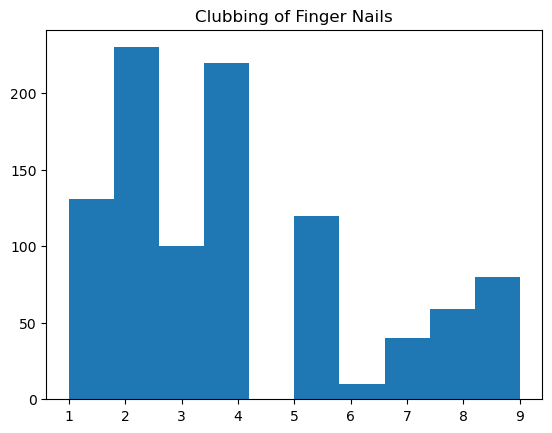

In [85]:
# We conclude from this figure that the level of clubbing of finger nails 
# is 71% of patient are less than 4 and 29% of patient are more than 5
plt.hist(df['Clubbing of Finger Nails']) 
plt.title('Clubbing of Finger Nails')

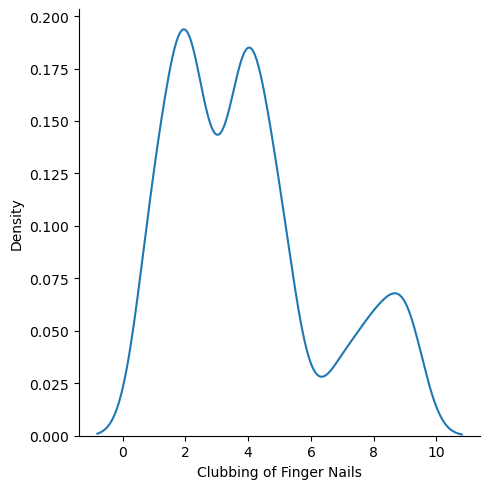

In [86]:
# We conclude from this figure that the level of clubbing of finger nails 
# in the intervals [0,2] , [3,4] , [6,9] increase and [2,3] , [4,6] , [9,10] decrease
sns.displot(x = 'Clubbing of Finger Nails', data = df, kind = 'kde')

Text(0.5, 1.0, 'Frequent Cold')

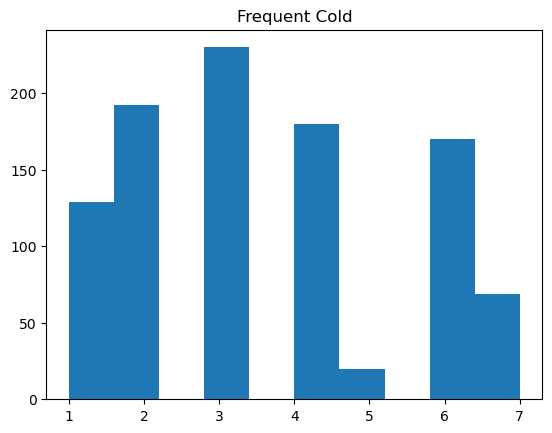

In [87]:
# We conclude from this figure that the level of frequent cold is 32% of patient are 1 or 2 
# and 25% of patient are 3 and 19% of patient are 4 or 5 and 24% of patient between 6 and 7
plt.hist(df['Frequent Cold']) 
plt.title('Frequent Cold')

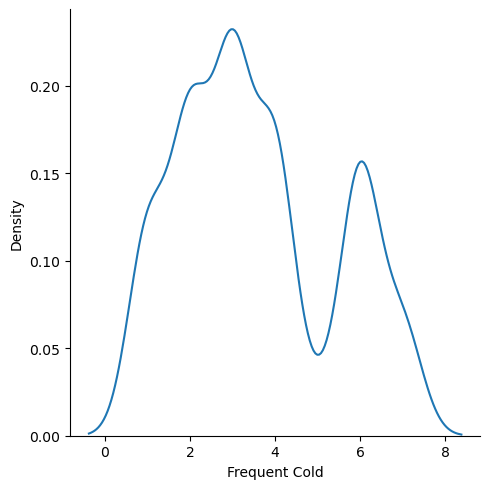

In [88]:
# We conclude from this figure that the level of frequent cold in the intervals [0,3] , [5,6] increase 
# and [3,5] , [6,8] decrease
sns.displot(x = 'Frequent Cold', data = df, kind = 'kde')

Text(0.5, 1.0, 'Dry Cough')

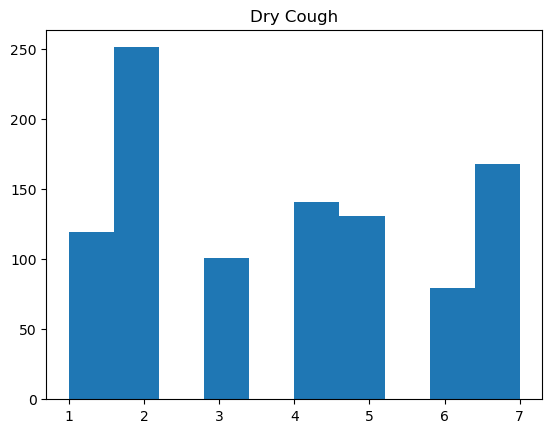

In [89]:
# We conclude from this figure that the level of dry cough is 37% of patient are 1 or 2 
# and 10% of patient are 3 and 27% of patient are 4 or 5 and 26% of patient between 6 and 7
plt.hist(df['Dry Cough']) 
plt.title('Dry Cough')

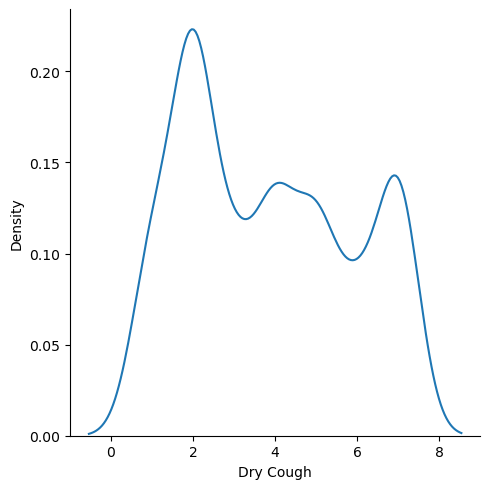

In [90]:
# We conclude from this figure that the level of dry cough in the intervals [0,2] , [3,4] , [6,7] increase 
# and [2,3] , [4,6] , [7,8] decrease
sns.displot(x = 'Dry Cough', data = df, kind = 'kde')

Text(0.5, 1.0, 'Snoring')

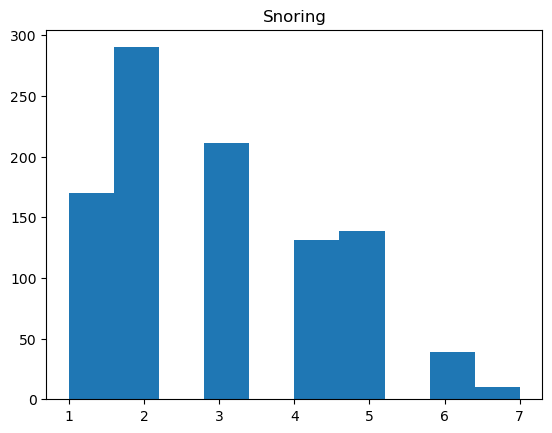

In [91]:
# We conclude from this figure that the level of snoring is 46% of patient are 1 or 2 
# and 21% of patient are 3 and 28% of patient are 4 or 5 and 5% of patient between 6 and 7 
plt.hist(df['Snoring']) 
plt.title('Snoring')

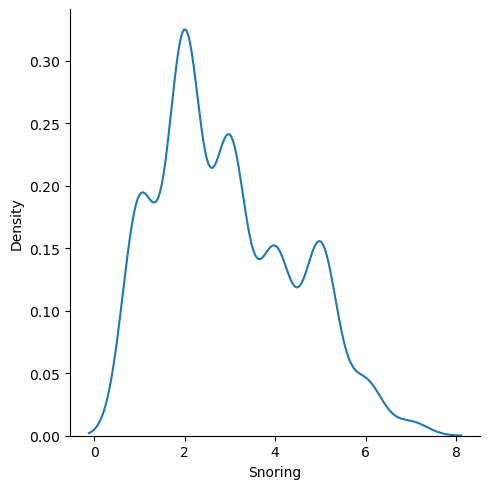

In [92]:
# We conclude from this figure that the highest percentage of patients is at point 2 of snoring 
# and the lowest percentage is at point 4.5
sns.displot(x = 'Snoring', data = df, kind = 'kde')

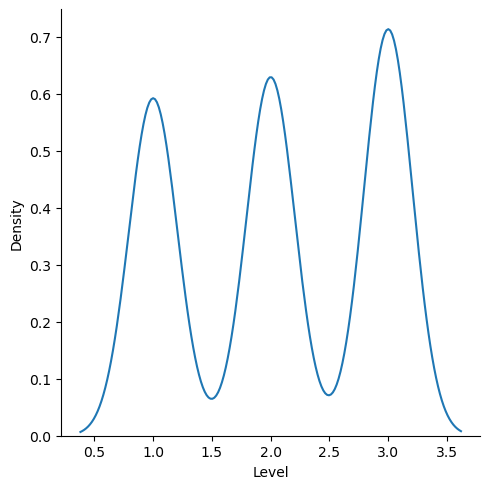

In [93]:
# We conclude from this figure that the highest percentage of patients is patient who high level 
# and the lowest percentage is patient who low level
sns.displot(x = 'Level', data = df, kind = 'kde')

<Axes: xlabel='count', ylabel='Age'>

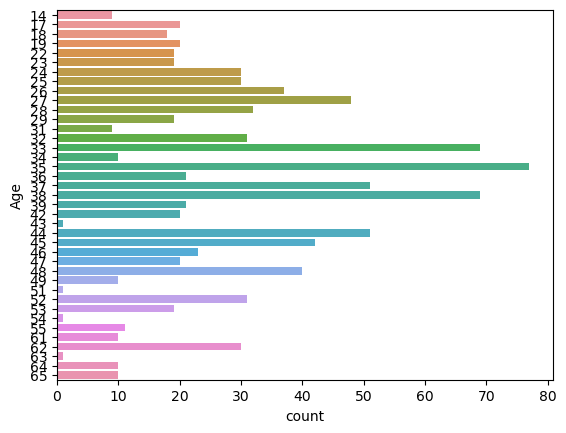

In [94]:
# We conclude from this figure that patients whose age is 35 years are the most
sns.countplot(y = 'Age', data = df)

<Axes: xlabel='Level', ylabel='Count'>

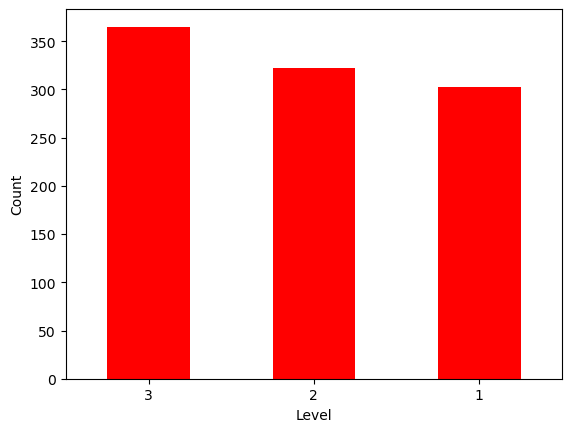

In [95]:
# We conclude from this figure that patient level is about 30% of patient are low 
# and 32% of patient are medium and 38% of patient are high
df['Level'].value_counts().plot(kind='bar', xlabel='Level', ylabel='Count', rot=0, color = 'red')

<Axes: >

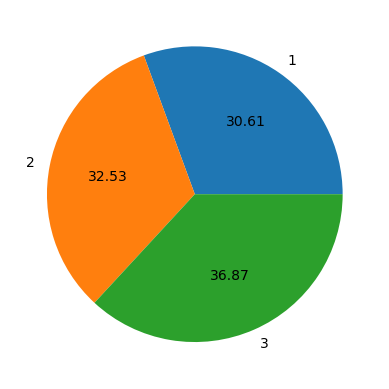

In [96]:
# We conclude from this figure that 64% of the patients aare men and 36%of the patients are women
df.groupby('Level').size().plot(kind='pie', autopct='%.2f')

<Axes: >

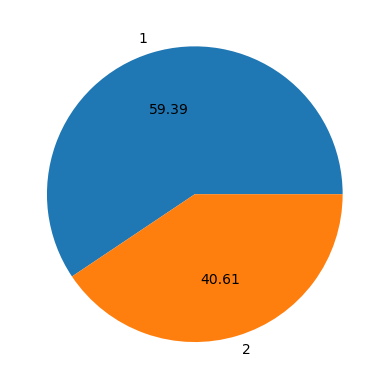

In [97]:
# We conclude from this figure the ratio of men(1) is more than the ratio of women(2)
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

In [98]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)
pred2 = kn.predict(X_test)
accuracy_2 = accuracy_score(y_test, pred2) * 100
f1_2 = f1_score(y_test, pred2, average='macro') * 100
precision_2 = precision_score(y_test, pred2, average='macro') * 100
recall_2 = recall_score(y_test, pred2, average='macro') * 100

print("Accuracy:", accuracy_2, '%')
print('F1-score:', f1_2, '%')
print('Precision:', precision_2, '%')
print('Recall:',recall_2,'%')

Accuracy: 88.38383838383838 %
F1-score: 87.68517133933663 %
Precision: 88.99980875884489 %
Recall: 87.71228000180487 %


In [100]:
lgreg = LogisticRegression()
lgreg.fit(X_train, y_train)
pred4 = lgreg.predict(X_test)
accuracy_4 = accuracy_score(y_test, pred4) * 100
f1_4 = f1_score(y_test, pred4, average='macro') * 100
precision_4 = precision_score(y_test, pred4, average='macro') * 100
recall_4 = recall_score(y_test, pred4, average='macro') * 100

print("Accuracy:", accuracy_4, '%')
print('F1-score:', f1_4, '%')
print('Precision:', precision_4, '%')
print('Recall:',recall_4,'%')

Accuracy: 92.42424242424242 %
F1-score: 92.09923459829793 %
Precision: 92.15404419652437 %
Recall: 92.06795334886472 %


C:\Users\Ahmed Salah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('F1-score:', f1_score(y_test, y_pred, average='macro')*100)
print('Precision:', precision_score(y_test, y_pred, average='macro')*100)
print('Recall:', recall_score(y_test, y_pred, average='macro')*100)

Accuracy: 87.87878787878788
F1-score: 87.90476676682518
Precision: 88.90794739851344
Recall: 87.34050056639666


In [102]:
# sns.boxplot(data=df, vert=True)

In [105]:
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train, y_train)
# pred6 = svc.predict(X_test)
# accuracy_6 = accuracy_score(y_test, pred6) * 100
# f1_6 = f1_score(y_test, pred6, average='macro') * 100
# precision_6 = precision_score(y_test, pred6, average='macro') * 100
# recall_6 = recall_score(y_test, pred6, average='macro') * 100

# print("Accuracy:", accuracy_6, '%')
# print('F1-score:', f1_6, '%')
# print('Precision:', precision_6, '%')
# print('Recall:',recall_6,'%')

In [106]:
# from sklearn.naive_bayes import MultinomialNB
# model = MultinomialNB()
# model.fit(X_train, y_train)
# pred1 = model.predict(X_test)
# accuracy = accuracy_score(y_test, pred1)
# f1 = f1_score(y_test, pred1, average='macro')
# precision = precision_score(y_test, pred1, average='macro')
# recall = recall_score(y_test, pred1, average='macro')
# accuracy_percentage = accuracy * 100
# f1_percentage = f1 * 100
# precision_percentage = precision * 100
# recall_percentage = recall * 100
# P_accuracy = format(accuracy_percentage, '.2f')
# P_f1 = format(f1_percentage, '.2f')
# P_precision = format(precision_percentage, '.2f')
# P_recall = format(recall_percentage, '.2f')
# print('Accuracy:', P_accuracy, '%')
# print('F1-score:', P_f1, '%')
# print('Precision:', P_precision, '%')
# print('Recall:',P_recall,'%')

In [108]:
# cm = confusion_matrix(y_test, pred2)
# print(cm)
# accuracy_score(y_test, pred2) * 100